In [216]:
from datetime import datetime, timedelta
import json
import pandas as pd
import requests
import matplotlib.pyplot as plt

season = 2021
round = 19 # Mexico

In [217]:
# fetch data

try:
    response = requests.get(
        url="https://ergast.com/api/f1/%d/%d/laps.json" % (season, round),
        params={
            "limit": "10000",
        },
    )
    print('Response HTTP Status Code: {status_code}'.format(
        status_code=response.status_code))

    lapTimesAll = json.loads(response.content)
except requests.exceptions.RequestException:
    print('HTTP Request failed')

Response HTTP Status Code: 200


In [218]:
# create table from raw data

lapTimesData = lapTimesAll['MRData']['RaceTable']['Races'][0]['Laps']

lapTimes = {
    'lap': [],
    'driver': [],
    'time': [],
    'position': []
}

for i in range(len(lapTimesData)):
    lap = lapTimesData[i]

    timings = lap['Timings']

    for j in range(len(timings)):
        timing = timings[j]

        lapTime = datetime.strptime(timing['time'], '%M:%S.%f')
        delta = timedelta(minutes=lapTime.minute, seconds=lapTime.second, microseconds=lapTime.microsecond)

        lapTimes['lap'].append(int(lap['number']))
        lapTimes['driver'].append(timing['driverId'])
        lapTimes['time'].append(delta)
        lapTimes['position'].append(int(timing['position']))

lapTimesDF = pd.DataFrame(lapTimes)
lapTimesDF.head()

,lap,driver,time,position
0,1,max_verstappen,0 days 00:01:18.399000,1
1,1,perez,0 days 00:01:19.651000,2
2,1,bottas,0 days 00:01:20.541000,3
3,1,leclerc,0 days 00:01:21.519000,4
4,1,sainz,0 days 00:01:22.506000,5


In [219]:
allLaps = lapTimesDF[['lap']].sort_values(['lap'], ascending=[True]).groupby(['lap']).first()
allLaps.head()

""
lap
1
2
3
4
5


In [220]:
lapTimesDFMax = lapTimesDF[lapTimesDF.driver.eq('max_verstappen')].sort_values('lap').reset_index(drop=True)
lapTimesDFMax.head(n=10)

,lap,driver,time,position
0,1,max_verstappen,0 days 00:01:18.399000,1
1,2,max_verstappen,0 days 00:01:14.680000,1
2,3,max_verstappen,0 days 00:01:14.471000,1
3,4,max_verstappen,0 days 00:01:14.713000,1
4,5,max_verstappen,0 days 00:01:14.660000,1
5,6,max_verstappen,0 days 00:01:27.488000,1
6,7,max_verstappen,0 days 00:01:59.850000,1
7,8,max_verstappen,0 days 00:02:13.610000,1
8,9,max_verstappen,0 days 00:02:29.633000,1
9,10,max_verstappen,0 days 00:01:14.805000,1


In [221]:
lapTimesDFHamilton = lapTimesDF[lapTimesDF.driver.eq('hamilton')].sort_values('lap').reset_index(drop=True)
lapTimesDFHamilton.head(n=10)

,lap,driver,time,position
0,1,hamilton,0 days 00:01:23.099000,6
1,2,hamilton,0 days 00:01:15.675000,6
2,3,hamilton,0 days 00:01:14.254000,4
3,4,hamilton,0 days 00:01:14.307000,4
4,5,hamilton,0 days 00:01:14.172000,3
5,6,hamilton,0 days 00:01:27.601000,3
6,7,hamilton,0 days 00:01:59.617000,3
7,8,hamilton,0 days 00:02:11.737000,3
8,9,hamilton,0 days 00:02:27.627000,3
9,10,hamilton,0 days 00:01:15.980000,3


In [222]:
lapTimesDFBottas = lapTimesDF[lapTimesDF.driver.eq('bottas')].sort_values('lap').reset_index(drop=True)
lapTimesDFBottas.head(n=10)

,lap,driver,time,position
0,1,bottas,0 days 00:01:20.541000,3
1,2,bottas,0 days 00:01:15.297000,3
2,3,bottas,0 days 00:01:14.954000,3
3,4,bottas,0 days 00:01:14.837000,3
4,5,bottas,0 days 00:01:17.488000,4
5,6,bottas,0 days 00:01:28.275000,4
6,7,bottas,0 days 00:01:58.619000,4
7,8,bottas,0 days 00:02:12.300000,4
8,9,bottas,0 days 00:02:25.925000,4
9,10,bottas,0 days 00:01:16.919000,4


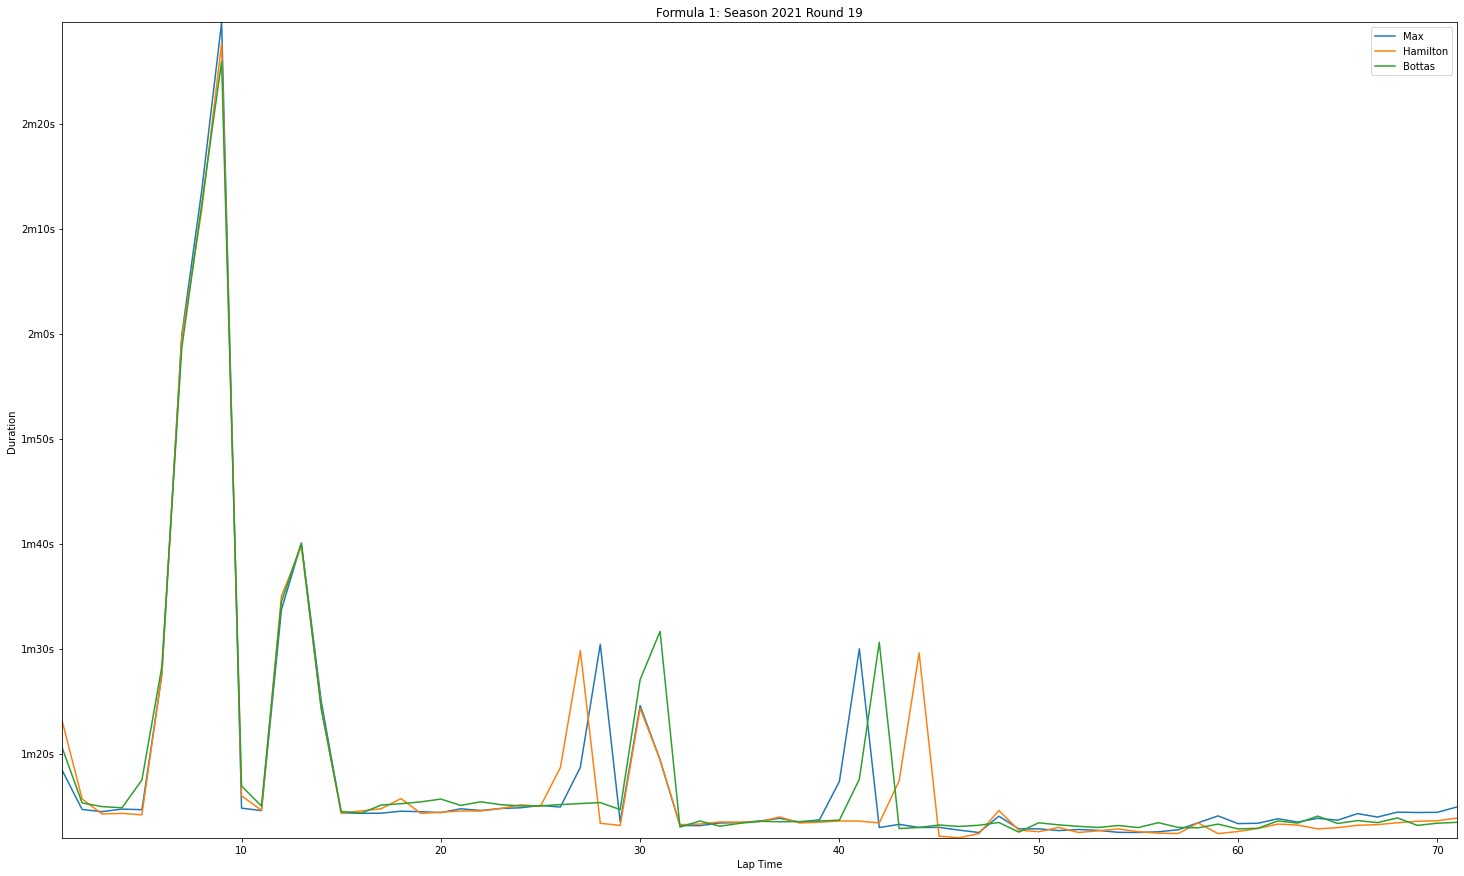

In [223]:
# plot

fig, ax = plt.subplots()
fig.set_size_inches(25, 15, forward=True)

ax.margins(x=0, y=0)
ax.set_title('Formula 1: Season %d Round %d' % (season, round))
ax.set_ylabel('Duration')
ax.set_xlabel('Lap Time')

def duration_fmt(x, pos):
    seconds = x / 1000000000
    minutes = (seconds // 60)
    secondsLeft = seconds - (minutes*60)

    return '%dm%ds' % (minutes, secondsLeft)

ax.yaxis.set_major_formatter(duration_fmt)

ax.plot(lapTimesDFMax.lap, lapTimesDFMax.time, label='Max')
ax.plot(lapTimesDFHamilton.lap, lapTimesDFHamilton.time, label='Hamilton')
ax.plot(lapTimesDFBottas.lap, lapTimesDFBottas.time, label='Bottas')

ax.legend()
plt.show()